# Examples

Let's have a look at the different [PlantUML](https://plantuml.com/) diagrams that the `cwl2puml` APIs are able to generate, given, for example, the [app-water-bodies.0.3.0](https://github.com/eoap/zarr-cloud-native-format/releases/download/0.3.0/app-water-bodies.0.3.0.cwl) Workflow.

## 1. Parsing

It is needed to read first a CWL document from a remote public URL:

In [1]:
import cwl_loader

cwl_document = cwl_loader.load_cwl_from_location('https://github.com/eoap/zarr-cloud-native-format/releases/download/0.3.0/app-water-bodies.0.3.0.cwl')

2025-09-20 01:46:44.657 | DEBUG    | cwl_loader:load_cwl_from_location:256 - Loading CWL document from https://github.com/eoap/zarr-cloud-native-format/releases/download/0.3.0/app-water-bodies.0.3.0.cwl...
2025-09-20 01:46:45.210 | DEBUG    | cwl_loader:_load_cwl_from_stream:259 - Reading stream from https://github.com/eoap/zarr-cloud-native-format/releases/download/0.3.0/app-water-bodies.0.3.0.cwl...
2025-09-20 01:46:45.234 | DEBUG    | cwl_loader:load_cwl_from_stream:233 - CWL data of type <class 'ruamel.yaml.comments.CommentedMap'> successfully loaded from stream
2025-09-20 01:46:45.235 | DEBUG    | cwl_loader:load_cwl_from_yaml:161 - Updating the model from version 'v1.0' to version 'v1.2'...
2025-09-20 01:46:45.236 | DEBUG    | cwl_loader:load_cwl_from_yaml:172 - Raw CWL document successfully updated to v1.2!
2025-09-20 01:46:45.236 | DEBUG    | cwl_loader:load_cwl_from_yaml:176 - Parsing the raw CWL document to the CWL Utils DAG...
2025-09-20 01:46:57.723 | DEBUG    | cwl_loader:

## 2. PlantUML diagrams

The samples below show how to render CWL document to a specific PlantUML diagram:

In [2]:
from cwl2puml import (
    to_puml,
    DiagramType
)
from io import (
    StringIO,
    BytesIO
)
from IPython.display import display_png
from plantuml import deflate_and_encode
from PIL import Image
from urllib.request import urlopen

def render(
    diagram_type: DiagramType,
    debug: bool = False
):
    out = StringIO()
    to_puml(
        cwl_document=cwl_document,
        diagram_type=diagram_type,
        output_stream=out
    )

    clear_output = out.getvalue()

    if debug:
        print(clear_output)

    encoded = deflate_and_encode(clear_output)
    diagram_url = f"https://www.plantuml.com/plantuml/png/{encoded}"

    with urlopen(diagram_url) as url:
        img = Image.open(BytesIO(url.read()))
    display_png(img)

### 2.1 Component diagram

The [component](https://plantuml.com/component-diagram) diagram represents the CWL document like chips on a motherboard.

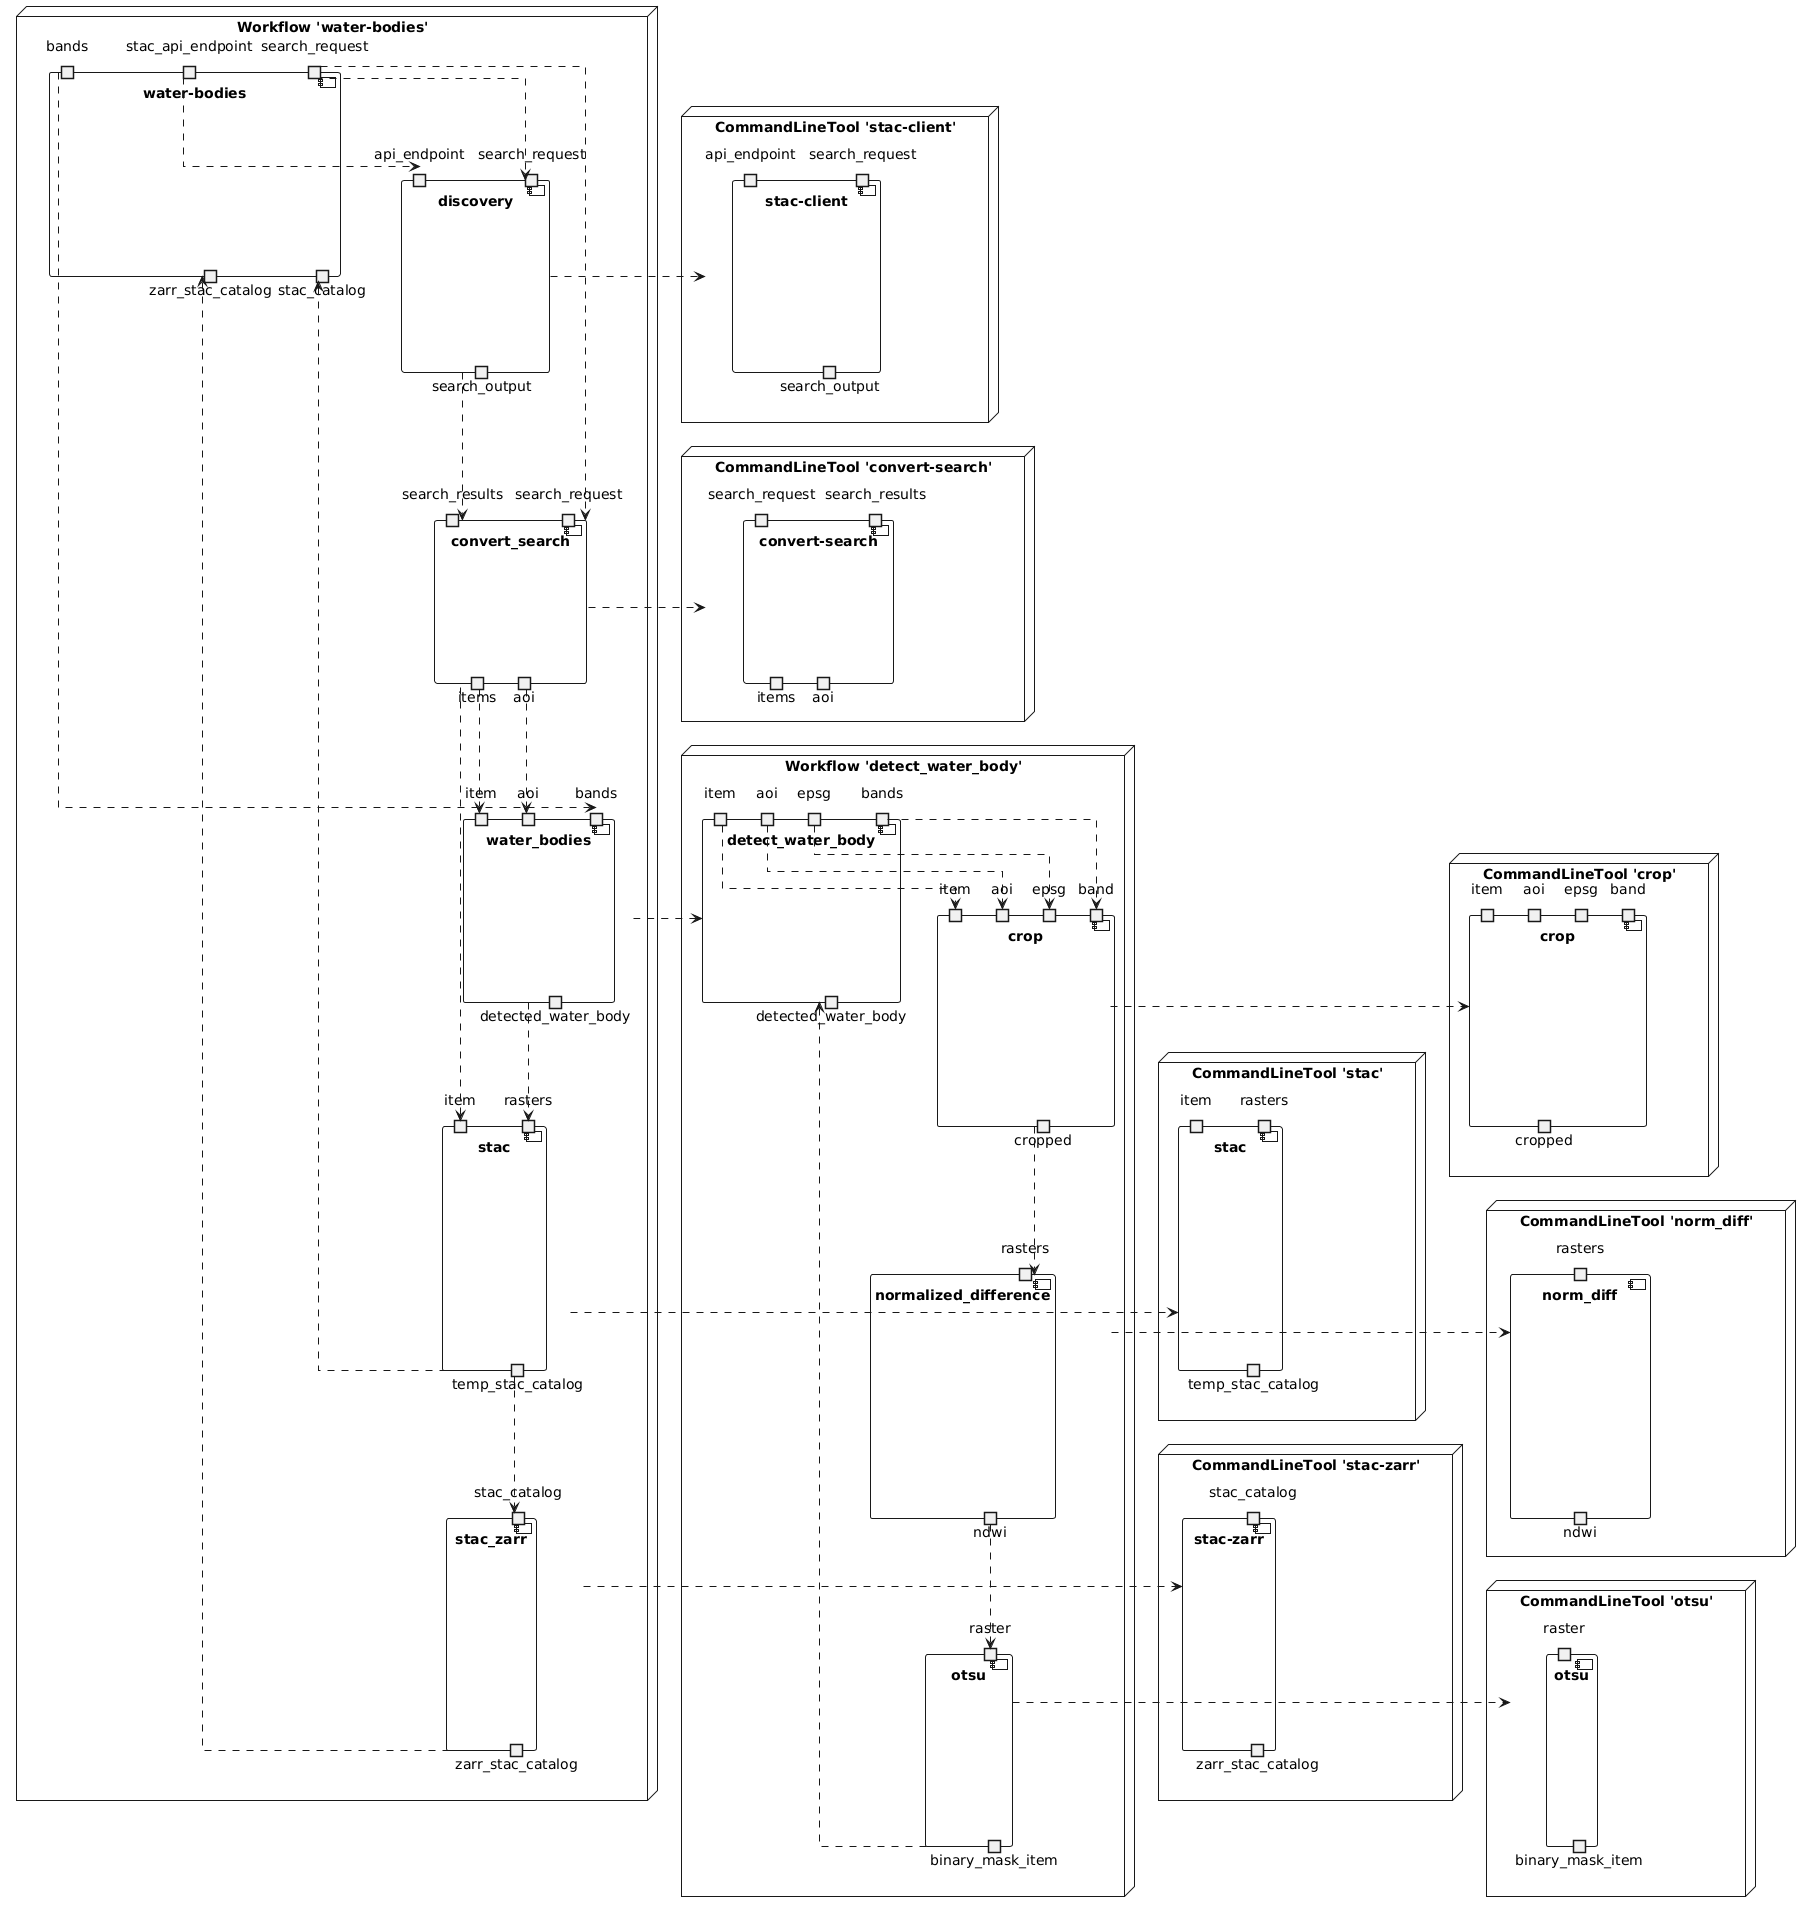

In [4]:
render(DiagramType.COMPONENT)

### 2.2 Class diagram

The [class](https://plantuml.com/class-diagram) diagram represents the CWL document like specifications of the previously illustrated chips on a motherboard.

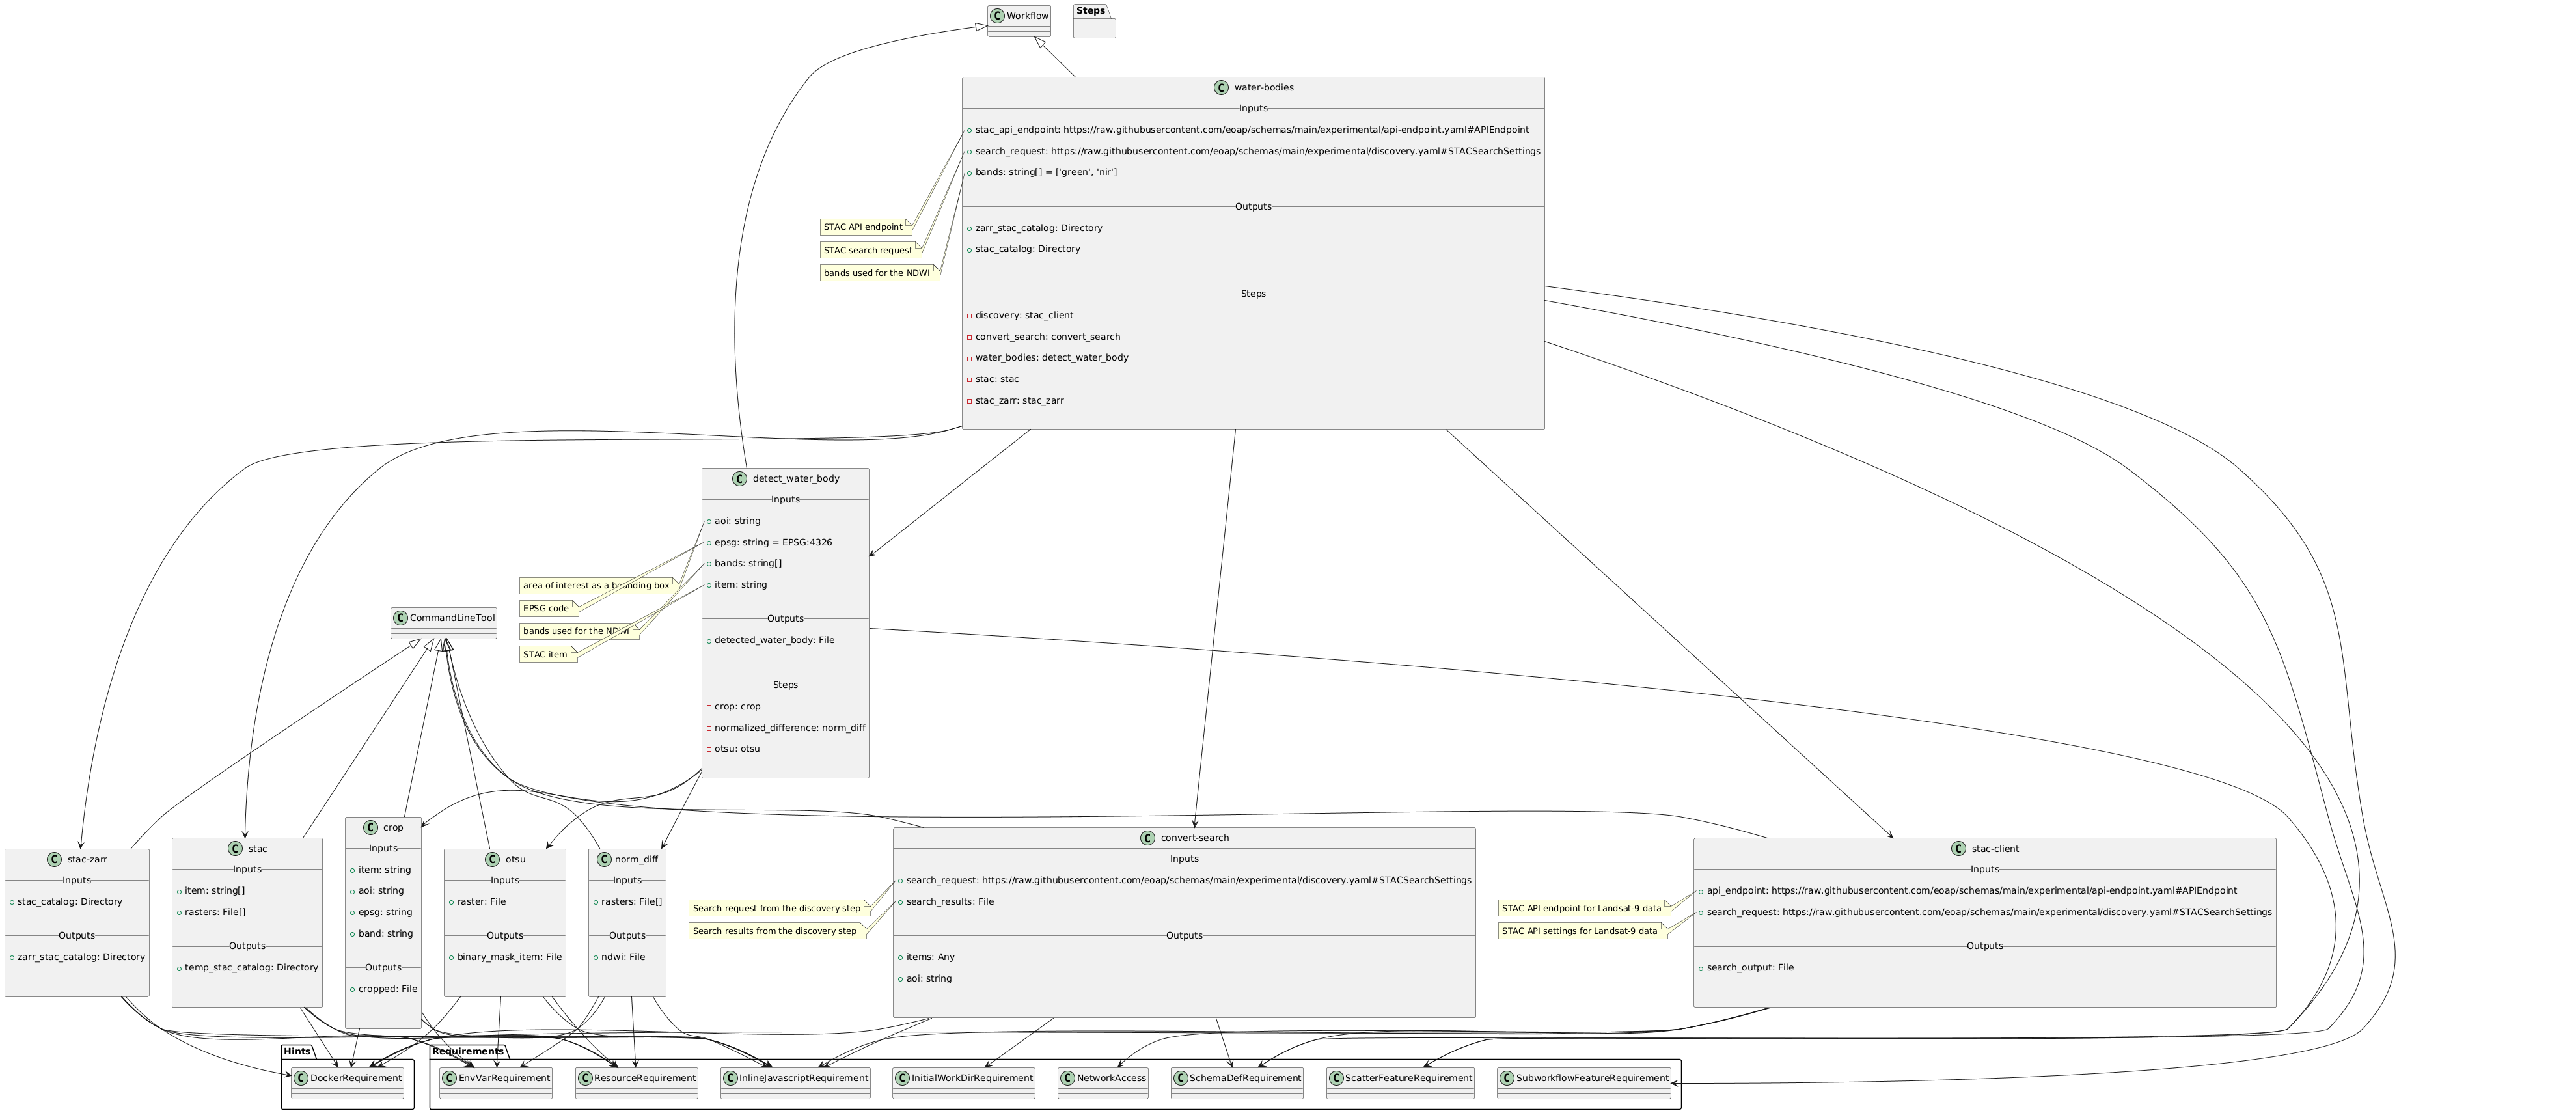

In [5]:
render(DiagramType.CLASS)

### 2.3 Sequence diagram

The [sequence](https://plantuml.com/sequence-diagram) diagram represents how the previously illustrated chips on a motherboard are triggered and interact with each other.

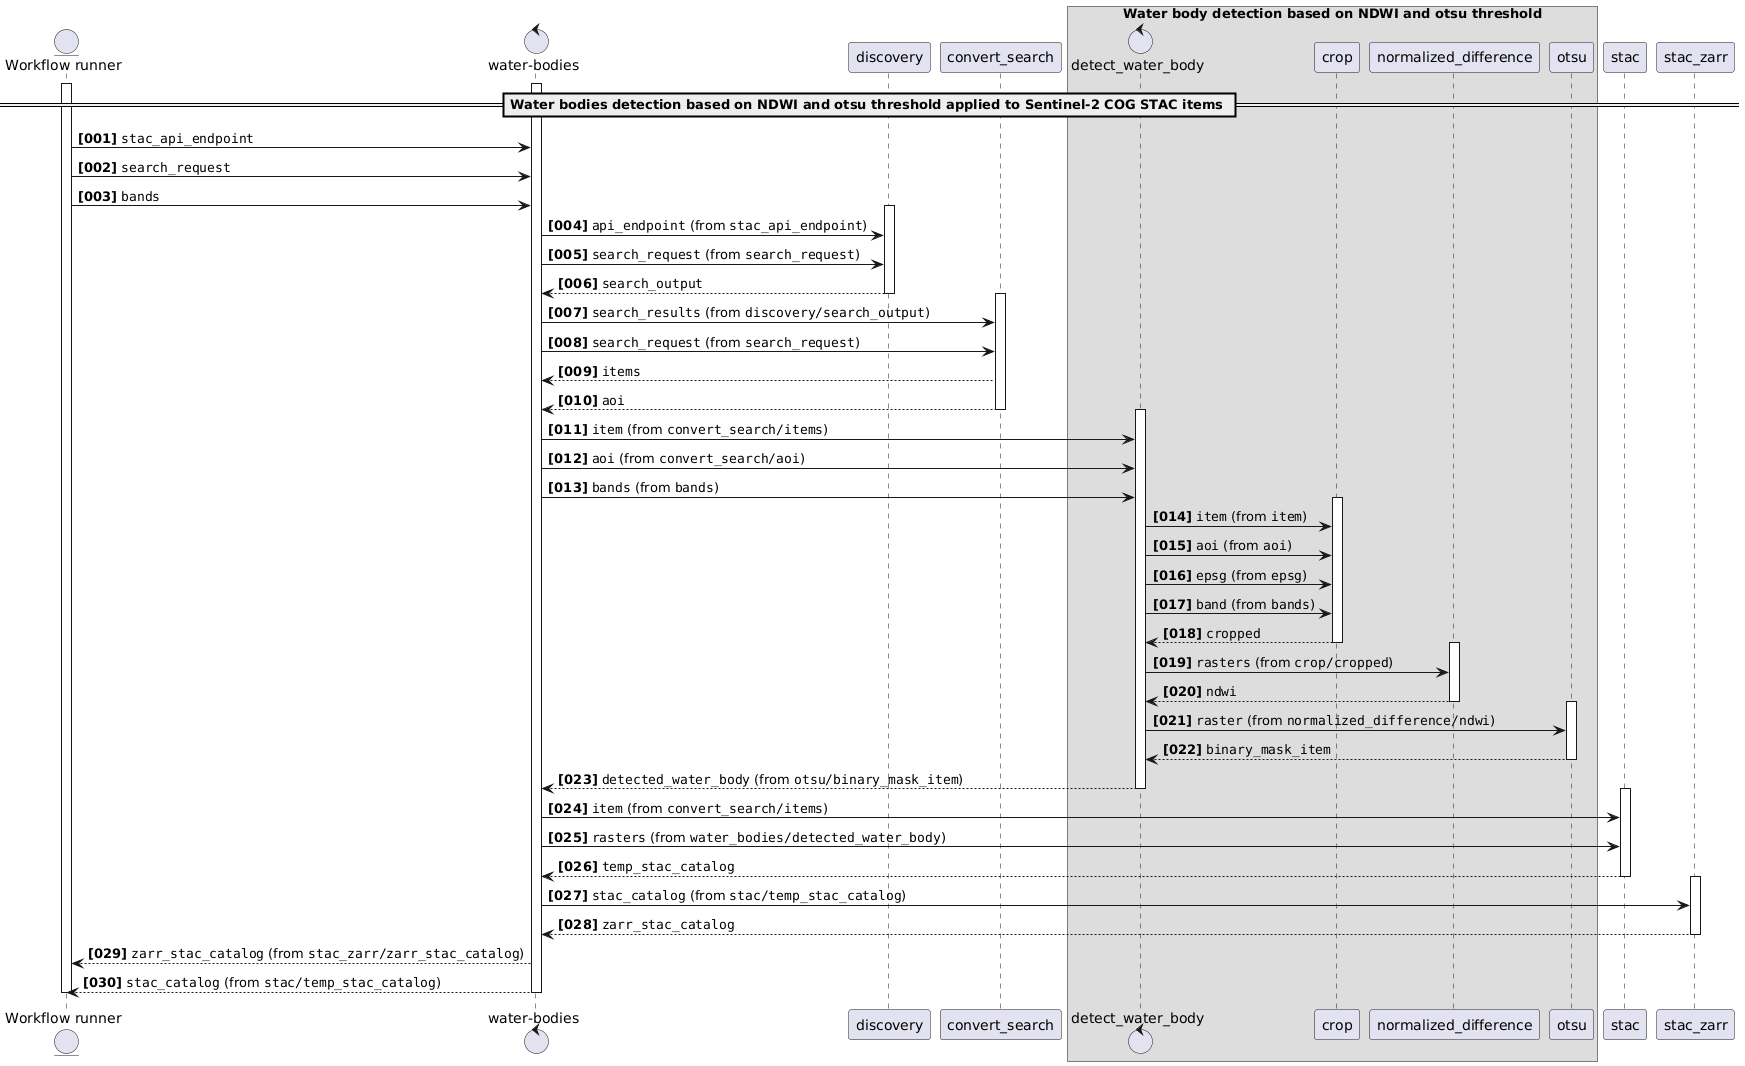

In [6]:
render(DiagramType.SEQUENCE)

### 2.4 State diagram

The [state](https://plantuml.com/state-diagram) diagram represents the dependencies between the inputs/outputs of the previously illustrated chips on a motherboard.

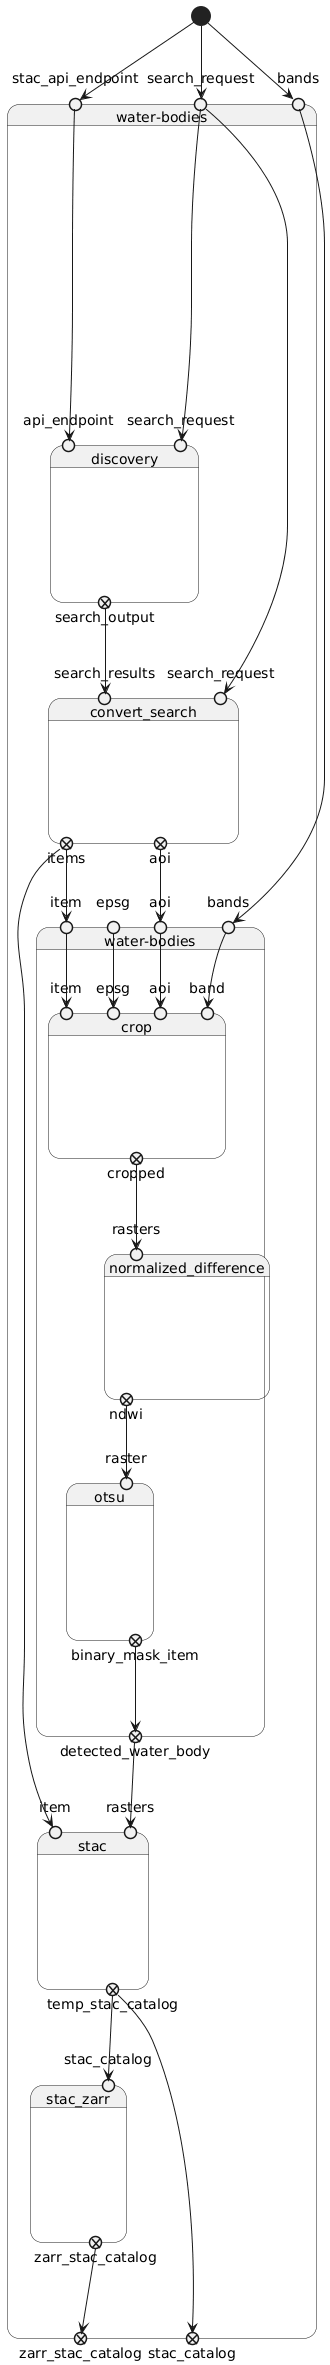

In [7]:
render(DiagramType.STATE)